# Data Analysis

In [12]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# Load data
data = pd.read_csv('../Data/non_nan_data.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


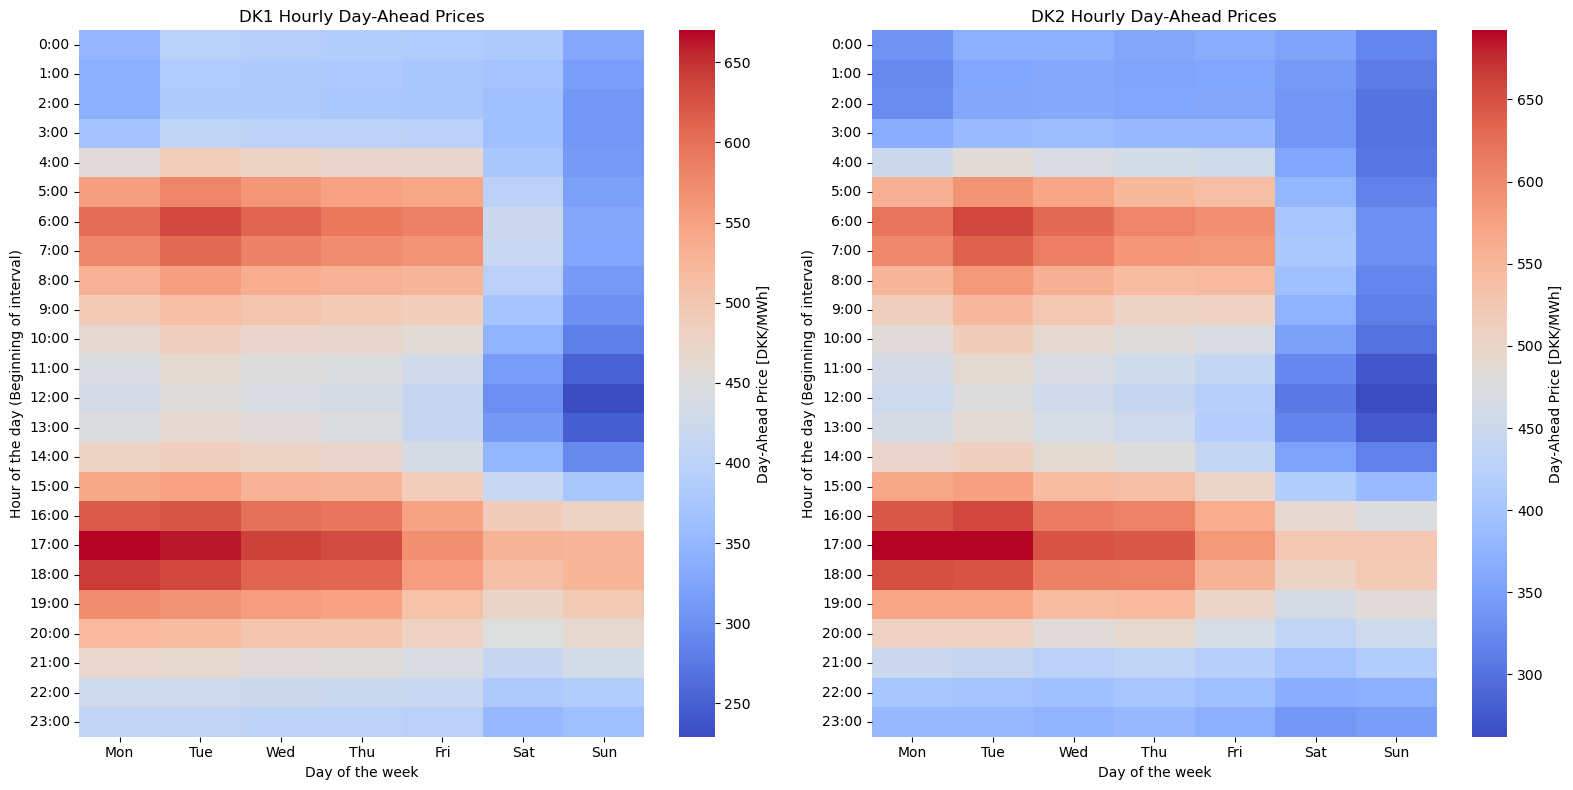

In [21]:
# Extract the hour of the day and the day of the week
data['hour'] = data['DATE'].dt.hour
data['day_of_week'] = data['DATE'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate the average spot price for DK1 and DK2 by day of week and hour
dk1_avg = data.groupby(['hour', 'day_of_week'])['DK1_spot'].mean().unstack()
dk2_avg = data.groupby(['hour', 'day_of_week'])['DK2_spot'].mean().unstack()

# Create the plot with two subplots (one for DK1 and one for DK2)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the heatmap for DK1
sns.heatmap(dk1_avg, ax=ax[0], cmap='coolwarm', cbar_kws={'label': 'Day-Ahead Price [DKK/MWh]'}, 
            xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
            yticklabels=[f'{i}:00' for i in range(24)], annot=False)
ax[0].set_title('DK1 Hourly Day-Ahead Prices')
ax[0].set_ylabel('Hour of the day (Beginning of interval)')
ax[0].set_xlabel('Day of the week')

# Plot the heatmap for DK2
sns.heatmap(dk2_avg, ax=ax[1], cmap='coolwarm', cbar_kws={'label': 'Day-Ahead Price [DKK/MWh]'}, 
            xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
            yticklabels=[f'{i}:00' for i in range(24)], annot=False)
ax[1].set_title('DK2 Hourly Day-Ahead Prices')
ax[1].set_ylabel('Hour of the day (Beginning of interval)')
ax[1].set_xlabel('Day of the week')

# Show the plot
plt.tight_layout()
plt.show()
